## Installing and Importing Packages

In [1]:
!nvidia-smi # checking for GPU ver.

Sun Feb  4 08:12:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# %pip install imbalanced-learn
# %pip install lightgbm
# %pip install cuml
# %pip show cuml
# export LDFLAGS="-L/opt/homebrew/opt/libomp/lib"
# export CPPFLAGS="-I/opt/homebrew/opt/libomp/include"


In [61]:
import pandas as pd
import numpy as np
import warnings
from scipy.sparse import vstack
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from nltk import word_tokenize, pos_tag, pos_tag_sents, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from catboost import Pool, CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from collections import Counter

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from wordcloud import WordCloud
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector
import spacy_fastlang
from nltk.corpus import stopwords, wordnet
from collections import Counter
import re
from symspellpy import SymSpell
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from bs4 import BeautifulSoup
from DataScraping_and_processing.emojii_and_emoticon_map import EMOTICONS_EMO, EMOJI_UNICODE
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import contractions
import string
import langid
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from textstat import textstat
from nltk import bigrams, trigrams, FreqDist
from sklearn_deltatfidf import DeltaTfidfVectorizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Preparation

In [4]:
# df = pd.read_csv("/kaggle/input/training-data/karthik_cleaned_data.csv", index_col=[0])
df = pd.read_csv("./DataScraping_and_processing/karthik_cleaned_data.csv", index_col=[0])
df.head()

,overall_rating,review_date,review_text,airline_name,NPS_category,NPS,language_info,clean_text,text_length,word_count,unique_word_count,word_density,uppercase_words,comma_count,exclamation_count,question_mark_count,avg_sentence_length,flesch_reading_score,gunning_fog_index
0,Rated 1 out of 5 stars,2023-09-18 03:29:15,EasyJet sent text at 4.00 am day of flight hom...,easyjet,Detractor,-1,en,text rush organise transport effort implicatio...,194,32,29,5.878788,0,1,0,0,6.600000,81.90,5.06
1,9,2023-12-01 00:00:00,Its been a few years when I flew a lot in A...,Vistara,Promoter,1,en,asia vistara surprise swift immaculate steward...,608,109,74,5.527273,3,7,0,0,27.250000,61.19,14.08
3,Rated 1 out of 5 stars,2018-09-09 20:37:11,one of the worst experiences with Air France e...,air france,Detractor,-1,en,ever bore carry duty inbound,204,30,30,6.580645,0,2,0,0,10.000000,61.33,8.00
4,Rated 1 out of 5 stars,2019-12-23 14:00:19,Not a single star this airlines deserves .I lo...,egyptair,Detractor,-1,en,deserves last block respond mail operator harr...,464,87,64,5.272727,4,2,0,0,14.833333,74.39,7.45
5,Rated 1 out of 5 stars,2023-12-29 06:42:56,I was forced to pay 150-euro worth penalty for...,ryanair,Detractor,-1,en,penalty fail earth would dare season arrogant ...,240,38,35,6.153846,1,1,0,1,12.666667,58.58,10.34


In [5]:
df.isna().sum()

overall_rating            0
review_date               0
review_text               0
airline_name              0
NPS_category              0
NPS                       0
language_info             0
clean_text              719
text_length               0
word_count                0
unique_word_count         0
word_density              0
uppercase_words           0
comma_count               0
exclamation_count         0
question_mark_count       0
avg_sentence_length       0
flesch_reading_score      0
gunning_fog_index         0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df["NPS_category"] = df["NPS_category"].map({"Detractor": 0, "Neutral": 1, "Promoter": 2})

### Bag of words

In [8]:
# creating bag of words representation

count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(df["clean_text"])

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    bow_matrix, df["NPS_category"], test_size=0.25, random_state=42)

clf_bow = MultinomialNB()
clf_bow.fit(X_train_bow, y_train_bow)
y_pred_bow = clf_bow.predict(X_test_bow)
print("BoW Classification Report:\n", classification_report(y_test_bow, y_pred_bow))

BoW Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11894
           1       0.07      0.01      0.01       338
           2       0.78      0.47      0.58      1920

    accuracy                           0.89     14152
   macro avg       0.58      0.48      0.51     14152
weighted avg       0.86      0.89      0.87     14152



### TFIDF


In [9]:
# creating a TF-IDF text representation

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(df["clean_text"])

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
    tfidf_matrix, df["NPS_category"], test_size=0.25, random_state=42)

clf_tfidf = MultinomialNB()
clf_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
print("TF-IDF Classification Report:\n", classification_report(y_test_tfidf, y_pred_tfidf))

TF-IDF Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92     11894
           1       0.00      0.00      0.00       338
           2       0.91      0.08      0.14      1920

    accuracy                           0.85     14152
   macro avg       0.59      0.36      0.35     14152
weighted avg       0.84      0.85      0.79     14152



/Users/daaa/opt/miniconda3/envs/torchenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daaa/opt/miniconda3/envs/torchenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/daaa/opt/miniconda3/envs/torchenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

### Delta Tfidf

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['NPS_category'], test_size=0.25, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

class_idfs = []
unique_classes = np.unique(y_train)
for class_idx in unique_classes:
    class_mask = (y_train == class_idx)
    class_docs = X_train[class_mask]
    class_vectorizer = TfidfVectorizer(vocabulary=tfidf_vectorizer.vocabulary_)
    class_tfidf = class_vectorizer.fit_transform(class_docs)
    class_idf = class_vectorizer.idf_
    class_idfs.append(class_idf)

mean_idf = np.mean(class_idfs, axis=0)

delta_idfs = [class_idf - mean_idf for class_idf in class_idfs]

class_to_index = {label: index for index, label in enumerate(unique_classes)}

X_train_delta_tfidf = []
for i, doc in enumerate(X_train_tfidf):
    class_idx = class_to_index[y_train.iloc[i]]
    delta_idf = delta_idfs[class_idx]
    X_train_delta_tfidf.append(doc.multiply(delta_idf))

X_train_delta_tfidf = vstack(X_train_delta_tfidf)

X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_test_delta_tfidf = []
for i, doc in enumerate(X_test_tfidf):
    class_idx = class_to_index[y_test.iloc[i]]
    delta_idf = delta_idfs[class_idx]
    X_test_delta_tfidf.append(doc.multiply(delta_idf))

X_test_delta_tfidf = vstack(X_test_delta_tfidf)

clf = LogisticRegression()
clf.fit(X_train_delta_tfidf, y_train)

y_pred = clf.predict(X_test_delta_tfidf)
print(classification_report(y_test, y_pred))

/Users/daaa/opt/miniconda3/envs/torchenv/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1375: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


              precision    recall  f1-score   support

   Detractor       0.96      1.00      0.98     11894
     Neutral       1.00      0.12      0.22       338
    Promoter       0.98      0.88      0.93      1920

    accuracy                           0.96     14152
   macro avg       0.98      0.67      0.71     14152
weighted avg       0.96      0.96      0.95     14152



### Delta Tfidf + class weights (Balancing Technique)

In [11]:
count_vectorizer = CountVectorizer()

# Fit and transform the clean_text to create BoW representation
bow_matrix = count_vectorizer.fit_transform(df["clean_text"])

# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    bow_matrix, df["NPS_category"], test_size=0.25, random_state=42, stratify=df["NPS_category"])

# Train the pipeline on the training data

# Initialize the classifier
clf_bow_res = LogisticRegression(class_weight='balanced')
# clf_bow_res = ComplementNB()

# Fit the classifier on the resampled training data
clf_bow_res.fit(X_train_delta_tfidf, y_train)

# Predict on the test set using the trained pipeline
y_pred = clf_bow_res.predict(X_test_delta_tfidf)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     11894
           1       0.94      0.76      0.84       338
           2       0.84      1.00      0.92      1920

    accuracy                           0.97     14152
   macro avg       0.93      0.91      0.91     14152
weighted avg       0.98      0.97      0.97     14152



### Delta Tfidf + random oversampling (Balancing Technique)

In [13]:
# Assuming df["clean_text"] and df["NPS_category"] are already defined

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the clean_text to create BoW representation
bow_matrix = count_vectorizer.fit_transform(df["clean_text"])

# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    bow_matrix, df["NPS_category"], test_size=0.25, random_state=42)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply RandomOverSampler to training data only
X_train_bow_res, y_train_bow_res = ros.fit_resample(X_train_delta_tfidf, y_train)

# Check the class distribution after resampling
print("Class distribution after Random OverSampling:", Counter(y_train_bow_res))

# Initialize the classifier
# clf_bow_res = ComplementNB()
clf_bow_res = LogisticRegression()

# Fit the classifier on the resampled training data
clf_bow_res.fit(X_train_bow_res, y_train_bow_res)

# Predict on the original (non-resampled) testing data
y_pred_bow_res = clf_bow_res.predict(X_test_delta_tfidf)

# Print the classification report
print("BoW Classification Report after Random OverSampling:\n", classification_report(y_test, y_pred_bow_res))

Class distribution after Random OverSampling: Counter({0: 35651, 2: 35651, 1: 35651})
BoW Classification Report after Random OverSampling:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     11894
           1       0.95      0.76      0.84       338
           2       0.87      1.00      0.93      1920

    accuracy                           0.98     14152
   macro avg       0.94      0.91      0.92     14152
weighted avg       0.98      0.98      0.98     14152



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Delta Tfidf + SMOTE (Balancing Technique)

In [14]:
# Assuming df["clean_text"] and df["NPS_category"] are already defined

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the clean_text to create BoW representation
bow_matrix = count_vectorizer.fit_transform(df["clean_text"])

# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    bow_matrix, df["NPS_category"], test_size=0.25, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data only
X_train_bow_smote, y_train_bow_smote = smote.fit_resample(X_train_delta_tfidf, y_train)

# Initialize the classifier
# clf_bow_smote = ComplementNB()
clf_bow_smote = LogisticRegression()

# Fit the classifier on the resampled training data
clf_bow_smote.fit(X_train_bow_smote, y_train_bow_smote)

# Predict on the original (non-resampled) testing data
y_pred_bow_smote = clf_bow_smote.predict(X_test_delta_tfidf)

# Print the classification report
print("BoW Classification Report after SMOTE:\n", classification_report(y_test, y_pred_bow_smote))

BoW Classification Report after SMOTE:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     11894
           1       0.54      0.93      0.68       338
           2       0.88      0.99      0.93      1920

    accuracy                           0.96     14152
   macro avg       0.81      0.96      0.87     14152
weighted avg       0.97      0.96      0.97     14152



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Delta Tfidf + Adasyn (Balancing Technique)

In [15]:
# Assuming df["clean_text"] and df["NPS_category"] are already defined

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the clean_text to create BoW representation
bow_matrix = count_vectorizer.fit_transform(df["clean_text"])

# Split the data into training and testing sets
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    bow_matrix, df["NPS_category"], test_size=0.25, random_state=42)

# Initialize ADASYN
adasyn = ADASYN(random_state=42)

# Apply ADASYN to training data only
X_train_bow_adasyn, y_train_bow_adasyn = adasyn.fit_resample(X_train_delta_tfidf, y_train)

# Initialize the classifier
# clf_bow_adasyn = ComplementNB()
clf_bow_adasyn = LogisticRegression()

# Fit the classifier on the resampled training data
clf_bow_adasyn.fit(X_train_bow_adasyn, y_train_bow_adasyn)

# Predict on the original (non-resampled) testing data
y_pred_bow_adasyn = clf_bow_adasyn.predict(X_test_delta_tfidf)

# Print the classification report
print("BoW Classification Report after ADASYN:\n", classification_report(y_test, y_pred_bow_adasyn))

BoW Classification Report after ADASYN:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     11894
           1       0.60      0.91      0.72       338
           2       0.84      1.00      0.91      1920

    accuracy                           0.96     14152
   macro avg       0.81      0.95      0.87     14152
weighted avg       0.97      0.96      0.96     14152



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Modelling


SGD instead of SVM: https://stackoverflow.com/questions/29704231/in-sklearn-what-is-the-difference-between-a-svm-model-with-linear-kernel-and-a-s <br>
Adaboost: https://www.mygreatlearning.com/blog/adaboost-algorithm/ <br>
Catboost: https://www.geeksforgeeks.org/catboost-ml/ <br>
LightGBM: https://www.kdnuggets.com/2022/01/data-scientists-reasons-lightgbm.html <br>
XGBoost: https://medium.com/sfu-cspmp/xgboost-a-deep-dive-into-boosting-f06c9c41349 <br>
Boosting Comparison: https://towardsdatascience.com/how-to-select-between-boosting-algorithm-e8d1b15924f7

In [16]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced', max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "SVM (SGD)": SGDClassifier(loss='hinge', class_weight='balanced', max_iter=1000, tol=1e-3),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier(enable_categorical=True, eval_metric='mlogloss'),
    "AdaBoost+DT": AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=100),
    "AdaBoost+LR": AdaBoostClassifier(base_estimator=LogisticRegression(multi_class='multinomial',class_weight='balanced',max_iter=1000),n_estimators=100),
    "Catboost": CatBoostClassifier(iterations=500,learning_rate=0.1,depth=6,l2_leaf_reg=3,cat_features=[], auto_class_weights='Balanced',verbose=200, task_type='GPU',devices='0:1'),
    "LightGBM": LGBMClassifier(boosting_type='gbdt', objective='multiclass',  learning_rate=0.09, max_depth=-1, random_state=42, n_estimators=100, device='gpu', gpu_platform_id=0, gpu_device_id=0)
}

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return {"Model": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

In [17]:
results = pd.DataFrame()

for name, model in tqdm(models.items(), desc="Evaluating Models"):
    results_row = evaluate_model(name, model, X_train_delta_tfidf, y_train, X_test_delta_tfidf, y_test)
    results = results._append(results_row, ignore_index=True)
    display(results)
    
results

Evaluating Models:   0%|          | 0/9 [00:00<?, ?it/s]

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.972583,0.976182,0.972583,0.973122


Evaluating Models:  11%|█         | 1/9 [00:04<00:36,  4.55s/it]

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.972583,0.976182,0.972583,0.973122
1,Decision Tree,0.955059,0.975233,0.955059,0.962839


Evaluating Models:  22%|██▏       | 2/9 [00:11<00:41,  5.99s/it]

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.972583,0.976182,0.972583,0.973122
1,Decision Tree,0.955059,0.975233,0.955059,0.962839
2,SVM (SGD),0.982829,0.983007,0.982829,0.981180


Evaluating Models:  33%|███▎      | 3/9 [00:11<00:20,  3.42s/it]

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.972583,0.976182,0.972583,0.973122
1,Decision Tree,0.955059,0.975233,0.955059,0.962839
2,SVM (SGD),0.982829,0.983007,0.982829,0.981180
3,Random Forest,0.980427,0.980246,0.980427,0.979131


Evaluating Models:  44%|████▍     | 4/9 [00:39<01:04, 12.96s/it]

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.972583,0.976182,0.972583,0.973122
1,Decision Tree,0.955059,0.975233,0.955059,0.962839
2,SVM (SGD),0.982829,0.983007,0.982829,0.981180
3,Random Forest,0.980427,0.980246,0.980427,0.979131
4,XGBoost,0.970322,0.970821,0.970322,0.968711


Evaluating Models:  56%|█████▌    | 5/9 [01:20<01:32, 23.14s/it]

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.972583,0.976182,0.972583,0.973122
1,Decision Tree,0.955059,0.975233,0.955059,0.962839
2,SVM (SGD),0.982829,0.983007,0.982829,0.981180
3,Random Forest,0.980427,0.980246,0.980427,0.979131
4,XGBoost,0.970322,0.970821,0.970322,0.968711
5,AdaBoost+DT,0.953010,0.953768,0.953010,0.949724


Evaluating Models:  67%|██████▋   | 6/9 [01:36<01:02, 20.80s/it]

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.972583,0.976182,0.972583,0.973122
1,Decision Tree,0.955059,0.975233,0.955059,0.962839
2,SVM (SGD),0.982829,0.983007,0.982829,0.981180
3,Random Forest,0.980427,0.980246,0.980427,0.979131
4,XGBoost,0.970322,0.970821,0.970322,0.968711
5,AdaBoost+DT,0.953010,0.953768,0.953010,0.949724
6,AdaBoost+LR,0.898954,0.955261,0.898954,0.917976


Evaluating Models:  78%|███████▊  | 7/9 [02:02<00:44, 22.42s/it]

0:	learn: 1.0357059	total: 654ms	remaining: 5m 26s
200:	learn: 0.3256890	total: 26.4s	remaining: 39.2s
400:	learn: 0.2541059	total: 50s	remaining: 12.3s
499:	learn: 0.2263709	total: 1m 2s	remaining: 0us


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.972583,0.976182,0.972583,0.973122
1,Decision Tree,0.955059,0.975233,0.955059,0.962839
2,SVM (SGD),0.982829,0.983007,0.982829,0.981180
3,Random Forest,0.980427,0.980246,0.980427,0.979131
4,XGBoost,0.970322,0.970821,0.970322,0.968711
5,AdaBoost+DT,0.953010,0.953768,0.953010,0.949724
6,AdaBoost+LR,0.898954,0.955261,0.898954,0.917976
7,Catboost,0.901215,0.937190,0.901215,0.909922


Evaluating Models:  89%|████████▉ | 8/9 [03:13<00:37, 37.80s/it]

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 192306
[LightGBM] [Info] Number of data points in the train set: 42454, number of used features: 4410
[LightGBM] [Info] Using requested OpenCL platform 0 device 0
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...


1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.
1 warning generated.


[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score -0.174644
[LightGBM] [Info] Start training from score -3.699631
[LightGBM] [Info] Start training from score -1.998700


/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:1192: UserWarning: Converting data to scipy sparse matrix.
  _log_warning('Converting data to scipy sparse matrix.')


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.972583,0.976182,0.972583,0.973122
1,Decision Tree,0.955059,0.975233,0.955059,0.962839
2,SVM (SGD),0.982829,0.983007,0.982829,0.981180
3,Random Forest,0.980427,0.980246,0.980427,0.979131
4,XGBoost,0.970322,0.970821,0.970322,0.968711
5,AdaBoost+DT,0.953010,0.953768,0.953010,0.949724
6,AdaBoost+LR,0.898954,0.955261,0.898954,0.917976
7,Catboost,0.901215,0.937190,0.901215,0.909922
8,LightGBM,0.978166,0.978414,0.978166,0.977243


Evaluating Models: 100%|██████████| 9/9 [03:36<00:00, 24.01s/it]


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.972583,0.976182,0.972583,0.973122
1,Decision Tree,0.955059,0.975233,0.955059,0.962839
2,SVM (SGD),0.982829,0.983007,0.982829,0.981180
3,Random Forest,0.980427,0.980246,0.980427,0.979131
4,XGBoost,0.970322,0.970821,0.970322,0.968711
5,AdaBoost+DT,0.953010,0.953768,0.953010,0.949724
6,AdaBoost+LR,0.898954,0.955261,0.898954,0.917976
7,Catboost,0.901215,0.937190,0.901215,0.909922
8,LightGBM,0.978166,0.978414,0.978166,0.977243


### Dimensionality reduction techniques

#### SVD

SVD finished
logreg init


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logreg fit
logreg predict
Accuracy: 0.8529536461277558
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     11894
           1       0.13      0.95      0.24       338
           2       0.99      0.75      0.85      1920

    accuracy                           0.85     14152
   macro avg       0.71      0.85      0.67     14152
weighted avg       0.98      0.85      0.90     14152



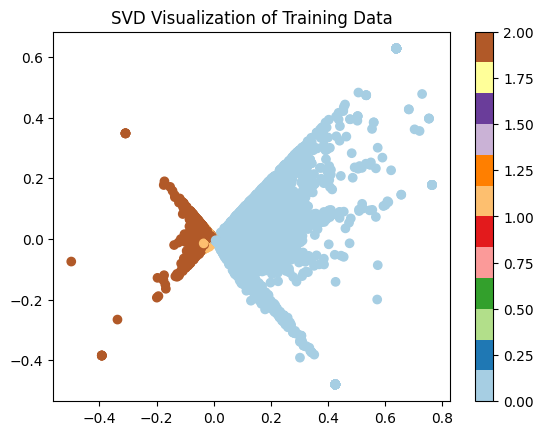

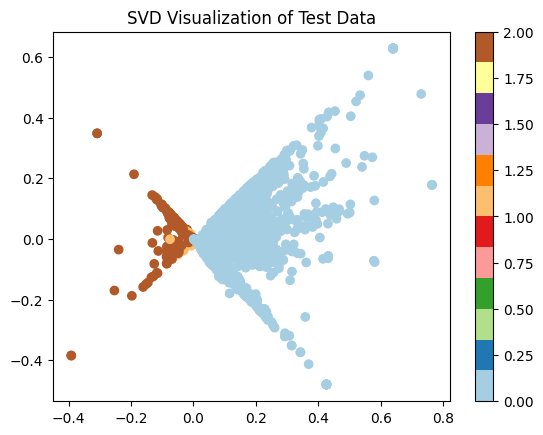

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming you have X_train, X_test, y_train, and y_test defined earlier

# Step 1: Apply Truncated SVD for feature reduction on CPU
n_components = 50  # Adjust the number of components
n_iter = 10  # Adjust the number of iterations
random_state = 42  # Set a fixed random state for reproducibility
algorithm = 'randomized'  # Experiment with different algorithms

svd = TruncatedSVD(
    n_components=n_components,
    n_iter=n_iter,
    random_state=random_state,
    algorithm=algorithm
)

# Fit and transform on training data
X_train_svd = svd.fit_transform(X_train_delta_tfidf.toarray())

# Transform on test data
X_test_svd = svd.transform(X_test_delta_tfidf.toarray())
print("SVD finished")

# Step 2: Logistic Regression with class weights for evaluation
logistic_regression = LogisticRegression(class_weight='balanced')
print("logreg init")

# Fit the model
logistic_regression.fit(X_train_svd, y_train)
print("logreg fit")

# Predictions
y_pred = logistic_regression.predict(X_test_svd)
print("logreg predict")

# Step 3: Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Step 4: Visualize SVD results
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.colorbar()
plt.title("SVD Visualization of Training Data")
plt.show()

plt.scatter(X_test_svd[:, 0], X_test_svd[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.colorbar()
plt.title("SVD Visualization of Test Data")
plt.show()

#### TSNE

In [19]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, classification_report
# # from sklearn.manifold import TSNE
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from cuml.manifold import TSNE

# # Assuming you have X_train, X_test, y_train, and y_test defined earlier

# n_components = 2  # You can adjust this value as needed
# perplexity = 30  # Adjust perplexity based on your data and desired results
# n_neighbors = 3 * perplexity  # Set the number of neighbors accordingly

# tsne = TSNE(n_components=n_components, n_neighbors=n_neighbors, random_state=42, perplexity=perplexity)
# print("TSNE init")

# # Fit and transform on training data
# X_train_tsne = tsne.fit_transform(X_train_delta_tfidf.toarray())

# # Transform on test data
# X_test_tsne = tsne.fit_transform(X_test_delta_tfidf.toarray())
# print("t-SNE finished")

# # Step 2: Logistic Regression with class weights for evaluation
# logistic_regression = LogisticRegression(class_weight='balanced')
# print("logreg init")

# # Fit the model
# logistic_regression.fit(X_train_tsne, y_train)
# print("logreg fit")

# # Predictions
# y_pred = logistic_regression.predict(X_test_tsne)
# print("logreg predict")

# # Step 3: Evaluation
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

# # Step 4: Visualize t-SNE results
# plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap=plt.cm.Paired)
# plt.colorbar()
# plt.title("t-SNE Visualization of Training Data")
# plt.show()

# plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test, cmap=plt.cm.Paired)
# plt.colorbar()
# plt.title("t-SNE Visualization of Test Data")
# plt.show()

## Evaluation

In [13]:
test_df = pd.read_csv("./DataScraping_and_processing/testing_data.csv", index_col=0)
test_df.head()

,overall_rating,review_date,review_text,airline_name
48188,Rated 1 out of 5 stars,"Monday, March 21, 2022 at 03:17:13 AM",I wrote to Pegasus about the frustrating issue...,pegasus airlines
41101,Rated 1 out of 5 stars,"Saturday, January 15, 2022 at 08:27:27 PM",DON'T I REPEAT DON'T TRAVEL WITH THIS SO CALLE...,icelandair
75409,Rated 5 out of 5 stars,"Monday, September 11, 2023 at 09:13:10 PM",Useful,volotea
54218,Rated 1 out of 5 stars,"Thursday, June 29, 2023 at 06:48:40 AM",Ryanair cancelled my flight less than 24hrs be...,ryanair
15113,Rated 1 out of 5 stars,"Thursday, February 24, 2022 at 03:28:20 PM",It’s clear that BA are not even interested in ...,british airways


In [18]:
test_df.shape

(16436, 4)

In [38]:
slang_dict = {}
word_freq = Counter()

with open('./DataScraping_and_processing/slang.txt', 'r') as file:
    slang_dict = {key.lower(): value.lower() for line in file if '=' in line for key, value in [line.strip().split('=', 1)]}
    
tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['review_text'])

feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

tfidf_sum = np.sum(tfidf_matrix, axis=0)
tfidf_scores = np.squeeze(np.asarray(tfidf_sum))

sorted_indices = np.argsort(tfidf_scores)

freq_word_threshold = np.quantile(tfidf_scores, 0.97) 
rare_word_threshold = np.quantile(tfidf_scores, 0.03)

FREQWORDS = set(feature_names[tfidf_scores > freq_word_threshold])
RAREWORDS = set(feature_names[tfidf_scores < rare_word_threshold])

print("Frequent Words:", FREQWORDS)
print("\nRare Words:", RAREWORDS)

def deteshapeanguage(text):
    lang, _ = langid.classify(text)
    return lang

tqdm.pandas(desc="Detecting languages")
test_df['language_info'] = test_df['review_text'].progress_apply(detect_language)
test_df.loc[test_df["language_info"] != "en"]

def remove_rows(dataframe):
    print("rows removed")
    return (dataframe.dropna()
            .drop_duplicates()
            .query("language_info == 'en'")
            .loc[dataframe['review_text'].str.split().str.len() > 2])

data_cleaning_pipeline = Pipeline([
    ('remove_rows', FunctionTransformer(remove_rows)),
])

# text cleaning functions

def remove_excess_space(text):
    text = " ".join(text.split()) 
    text = re.sub(r'\s([?.!"](?:\s|$))', r'\1', text)
    return text

def remove_url(text):
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    return re.sub(regex, '', text)

def html_tag_remover(text):
    soup = BeautifulSoup(text)
    text = soup.get_text()
    return text

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def normalize_exaggerated_text(text):
    normalized_text = re.sub(r'(.)\1{2,}', r'\1', text)
    return normalized_text

def replace_slang(text):
    pattern = re.compile(r'\b(' + '|'.join(re.escape(key) for key in slang_dict.keys()) + r')\b')
    return pattern.sub(lambda x: slang_dict[x.group().lower()], text)

def convert_emoticons_and_emojis(text):
    for emote in EMOTICONS_EMO:
        escaped_emote = re.escape(emote)
        text = re.sub(u'('+escaped_emote+')', "_".join(EMOTICONS_EMO[emote].replace(",","").split()), text)
    
    for emoji in EMOJI_UNICODE:
        escaped_emoji = re.escape(EMOJI_UNICODE[emoji])
        text = re.sub(escaped_emoji, emoji.strip(":"), text)
    
    return text

def remove_username(text): 
    return re.sub('@[^\s]+','',text)

symsp = SymSpell()
symsp.load_dictionary('./DataScraping_and_processing/my_frequency_dictionary.txt', term_index=0, count_index=1, separator=' ')

def correct_spelling(text):
    corrected = symsp.lookup_compound(text, max_edit_distance=2)
    return corrected[0].term if corrected else text

def remove_money(text):
    pattern = r'(?:\$|\£|\€|\₹)?\d+(?:\.\d{1,2})?'
    return re.sub(pattern, '', text)

def fix_negation(sentence):
    for i in range(1, len(sentence)):
        if sentence[i-1] in ['not', "n't"]:
            synsets = wordnet.synsets(sentence[i])
            if synsets:
                w1 = synsets[0]
                antonyms = [l.antonyms()[0].name() for l in w1.lemmas() if l.antonyms()]
                if antonyms:
                    max_dissimilarity = 0
                    for ant in antonyms:
                        ant_synsets = wordnet.synsets(ant)
                        if ant_synsets:
                            dissimilarity = 1 - w1.wup_similarity(ant_synsets[0])
                            if dissimilarity > max_dissimilarity:
                                max_dissimilarity = dissimilarity
                                sentence[i] = ant
                    sentence[i-1] = ''

    sentence = [word for word in sentence if word]
    return sentence


STOPWORDS = stopwords.words("english")
STOPWORDS += ['u', 'back', 'one']

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

# feature engineering functions

def count_uppercase_words(text):
    return sum(word.isupper() for word in text.split())

def avg_sentence_length(txt):
    sents = re.split(r'[.!?]+', txt)
    sents = [i.strip() for i in sents if i.strip()]
    word_counts = [len(i.split()) for i in sents]

    if len(word_counts) > 0:
        return sum(word_counts) / len(word_counts)
    else:
        return 0

def unique_word_count(text):
    words = re.findall(r'\w+', text.lower())
    word_count = Counter(words)
    return len(word_count)

# feature engineering functions

def count_uppercase_words(text):
    return sum(word.isupper() for word in text.split())

def avg_sentence_length(txt):
    sents = re.split(r'[.!?]+', txt)
    sents = [i.strip() for i in sents if i.strip()]
    word_counts = [len(i.split()) for i in sents]

    if len(word_counts) > 0:
        return sum(word_counts) / len(word_counts)
    else:
        return 0
    
def pos_proportions(text, pos_tag):
    sentences = sent_tokenize(text)
    tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
    tagged_sentences = pos_tag_sents(tokenized_sentences)
    
    pos_counts = 0
    total_words = 0
    
    for sentence in tagged_sentences:
        for word, tag in sentence:
            if word.isalpha():
                total_words += 1
                if tag.startswith(pos_tag):
                    pos_counts += 1
    
    return pos_counts / total_words if total_words > 0 else 0


def unique_word_count(text):
    words = re.findall(r'\w+', text.lower())
    word_count = Counter(words)
    return len(word_count)
# text cleaning pipeline

tqdm.pandas()

text_preprocessing_pipeline = Pipeline(steps=[
    ('lowercase', FunctionTransformer(lambda x: x.progress_apply(str.lower))),
    ('remove excess whitespace', FunctionTransformer(lambda x: x.progress_apply(remove_excess_space))),
    ('remove_url', FunctionTransformer(lambda x: x.progress_apply(remove_url))),
    ('html_tag_remover', FunctionTransformer(lambda x: x.progress_apply(html_tag_remover))),
    ('money_remover', FunctionTransformer(lambda x: x.progress_apply(remove_money))),
    ('convert_emoticons_and_emojii', FunctionTransformer(lambda x: x.progress_apply(convert_emoticons_and_emojis))),
    ('remove_username', FunctionTransformer(lambda x: x.progress_apply(remove_username))),
    ('replace_slang', FunctionTransformer(lambda x: x.progress_apply(replace_slang))),
    ('correct_spelling', FunctionTransformer(lambda x: x.progress_apply(correct_spelling))),
    ('expand_contractions', FunctionTransformer(lambda x: x.progress_apply(lambda text: contractions.fix(text)))),
    ('fix_negation', FunctionTransformer(lambda x: x.progress_apply(lambda text: " ".join(fix_negation(word_tokenize(text)))))),
    ('remove_punctuation', FunctionTransformer(lambda x: x.progress_apply(remove_punctuation))),
    ('normalize_exaggerated_text', FunctionTransformer(lambda x: x.progress_apply(normalize_exaggerated_text))),
    ('remove_stopwords', FunctionTransformer(lambda x: x.progress_apply(remove_stopwords))),
    ('remove_freqwords', FunctionTransformer(lambda x: x.progress_apply(remove_freqwords))),
    ('remove_rarewords', FunctionTransformer(lambda x: x.progress_apply(remove_rarewords))),
    ('lemmatize_words', FunctionTransformer(lambda x: x.progress_apply(lemmatize_words)))
])

# feature engineering pipeline

class CustomTextFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        print("feature engineering")
        X = X.copy() # creating a copy instead of modifying original here
        X["text_length"] = X["review_text"].progress_apply(len)
        X["word_count"] = X["review_text"].progress_apply(lambda x: len(x.split()))
        X['unique_word_count'] = X['review_text'].progress_apply(unique_word_count)
        X['word_density'] = X['text_length'] / (X['word_count']+1)
        X['uppercase_words'] = X['review_text'].progress_apply(count_uppercase_words)
        X['comma_count'] = X['review_text'].progress_apply(lambda x: x.count(','))
        X['exclamation_count'] = X['review_text'].progress_apply(lambda x: x.count('!'))
        X['question_mark_count'] = X['review_text'].progress_apply(lambda x: x.count('?'))
        X['avg_sentence_length'] = X['review_text'].progress_apply(avg_sentence_length)
        X['POS_Nouns'] = X['review_text'].progress_apply(lambda x: pos_proportions(x, "NN"))
        X['POS_Verbs'] = X['review_text'].progress_apply(lambda x: pos_proportions(x, "VB"))
        X['flesch_reading_score'] = X['review_text'].progress_apply(textstat.flesch_reading_ease)
        X['gunning_fog_index'] = X['review_text'].progress_apply(textstat.gunning_fog)
        return X
    
feature_generation_pipeline = Pipeline([
    ('custom_features', CustomTextFeatures())
])

Frequent Words: {'unhelpful', 'missing', 'difference', 'early', 'prior', 'cabin', 'don', 'idea', 'law', 'message', 'voucher', '14', 'number', 'fact', 'value', 'expect', 'takes', 'meals', 'given', 'fault', 'scheduled', '19', 'away', 'options', 'ignored', 'family', 'lose', 'matter', 'ryanair', 'pay', 'ok', 'ruined', 'personal', 'centre', 'explain', 'hours', 'busy', 'airlines', 'attendants', 'stuff', 'return', 'baby', 'allowed', 'answer', 'hope', 'minutes', 'sit', 'absolute', 'economy', 'space', 'available', 'future', 'received', 'gate', 'easy', 'kind', 'high', 'unacceptable', 'issue', 'arrived', 'passenger', 'review', 'unprofessional', 'bit', 'small', 'rebooked', '2023', 'day', 'services', 'claim', 'husband', 'answers', 'business', 'min', 'hand', 'cancelled', 'asked', 'sort', 'took', 'phone', 'best', 'ended', 'partner', 'insurance', 'minute', 'europe', 'premium', 'management', 'receive', 'treated', 'working', 'special', 'truly', 'case', 'incompetent', 'board', 'managed', 'says', 'half', 

Detecting languages: 100%|███████████████| 15361/15361 [00:59<00:00, 258.72it/s]


In [39]:
test_df = data_cleaning_pipeline.fit_transform(test_df)
test_df['clean_text'] = text_preprocessing_pipeline.fit_transform(test_df['review_text'])
processed_df = feature_generation_pipeline.fit_transform(test_df)
processed_df.head()

rows removed


  0%|                                                 | 0/15361 [00:00<?, ?it/s]/var/folders/90/q7dj_p6j3gx0cls87s3y0myc0000gq/T/ipykernel_36427/3958916393.py:57: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text)
100%|███████████████████████████████████| 15361/15361 [00:09<00:00, 1618.59it/s]


feature engineering


100%|███████████████████████████████████| 15361/15361 [00:01<00:00, 8823.92it/s]


,overall_rating,review_date,review_text,airline_name,language_info,clean_text,text_length,word_count,unique_word_count,word_density,uppercase_words,comma_count,exclamation_count,question_mark_count,avg_sentence_length,POS_Nouns,POS_Verbs,flesch_reading_score,gunning_fog_index
48188,Rated 1 out of 5 stars,"Monday, March 21, 2022 at 03:17:13 AM",I wrote to Pegasus about the frustrating issue...,pegasus airlines,en,write pegasus frustrate even,236,44,32,5.244444,2,1,0,0,14.666667,0.181818,0.090909,73.47,8.61
41101,Rated 1 out of 5 stars,"Saturday, January 15, 2022 at 08:27:27 PM",DON'T I REPEAT DON'T TRAVEL WITH THIS SO CALLE...,icelandair,en,repeat phone take restriction could normal cir...,474,87,70,5.386364,18,3,0,0,43.500000,0.280899,0.168539,52.70,19.70
54218,Rated 1 out of 5 stars,"Thursday, June 29, 2023 at 06:48:40 AM",Ryanair cancelled my flight less than 24hrs be...,ryanair,en,less departs answer keep bot fight get full ev...,278,50,44,5.450980,5,1,2,0,16.666667,0.244898,0.224490,71.44,8.28
15113,Rated 1 out of 5 stars,"Thursday, February 24, 2022 at 03:28:20 PM",It’s clear that BA are not even interested in ...,british airways,en,even interested rant effort part needless airp...,335,63,53,5.234375,1,1,0,0,21.000000,0.269841,0.158730,67.08,12.21
16266,Rated 1 out of 5 stars,"Thursday, August 5, 2021 at 04:58:50 PM",Waited for 2 hours for customer service to res...,british airways,en,call urgent call respond,120,21,18,5.454545,0,0,0,0,11.000000,0.263158,0.210526,60.82,8.01


In [43]:
def classify_nps(rating_text):
    rating_text = rating_text.strip()
    if "Rated" in rating_text:
        rating = int(rating_text.split(' ')[1])
        return "Detractor" if rating <= 2 else ("Neutral" if rating == 3 else "Promoter")
    else:
        rating = int(float(rating_text))
        return "Detractor" if rating <= 6 else ("Neutral" if rating <= 8 else "Promoter")
        
        
        
processed_df["NPS_category"] = processed_df["overall_rating"].apply(classify_nps)
processed_df["NPS_category"] = processed_df["NPS_category"].map({"Detractor": 0, "Neutral": 1, "Promoter": 2})
processed_df.head()

,overall_rating,review_date,review_text,airline_name,language_info,clean_text,text_length,word_count,unique_word_count,word_density,uppercase_words,comma_count,exclamation_count,question_mark_count,avg_sentence_length,POS_Nouns,POS_Verbs,flesch_reading_score,gunning_fog_index,NPS_category
48188,Rated 1 out of 5 stars,"Monday, March 21, 2022 at 03:17:13 AM",I wrote to Pegasus about the frustrating issue...,pegasus airlines,en,write pegasus frustrate even,236,44,32,5.244444,2,1,0,0,14.666667,0.181818,0.090909,73.47,8.61,0
41101,Rated 1 out of 5 stars,"Saturday, January 15, 2022 at 08:27:27 PM",DON'T I REPEAT DON'T TRAVEL WITH THIS SO CALLE...,icelandair,en,repeat phone take restriction could normal cir...,474,87,70,5.386364,18,3,0,0,43.500000,0.280899,0.168539,52.70,19.70,0
54218,Rated 1 out of 5 stars,"Thursday, June 29, 2023 at 06:48:40 AM",Ryanair cancelled my flight less than 24hrs be...,ryanair,en,less departs answer keep bot fight get full ev...,278,50,44,5.450980,5,1,2,0,16.666667,0.244898,0.224490,71.44,8.28,0
15113,Rated 1 out of 5 stars,"Thursday, February 24, 2022 at 03:28:20 PM",It’s clear that BA are not even interested in ...,british airways,en,even interested rant effort part needless airp...,335,63,53,5.234375,1,1,0,0,21.000000,0.269841,0.158730,67.08,12.21,0
16266,Rated 1 out of 5 stars,"Thursday, August 5, 2021 at 04:58:50 PM",Waited for 2 hours for customer service to res...,british airways,en,call urgent call respond,120,21,18,5.454545,0,0,0,0,11.000000,0.263158,0.210526,60.82,8.01,0


In [50]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])
y_train = df['NPS_category']

# 2-4. Compute Class-specific IDFs and Adjust Training TF-IDF
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['NPS_category'], test_size=0.25, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

class_idfs = []
unique_classes = np.unique(y_train)
for class_idx in unique_classes:
    class_mask = (y_train == class_idx)
    class_docs = X_train[class_mask]
    class_vectorizer = TfidfVectorizer(vocabulary=tfidf_vectorizer.vocabulary_)
    class_tfidf = class_vectorizer.fit_transform(class_docs)
    class_idf = class_vectorizer.idf_
    class_idfs.append(class_idf)

mean_idf = np.mean(class_idfs, axis=0)

delta_idfs = [class_idf - mean_idf for class_idf in class_idfs]

class_to_index = {label: index for index, label in enumerate(unique_classes)}

X_train_delta_tfidf = []
for i, doc in enumerate(X_train_tfidf):
    class_idx = class_to_index[y_train.iloc[i]]
    delta_idf = delta_idfs[class_idx]
    X_train_delta_tfidf.append(doc.multiply(delta_idf))

X_train_delta_tfidf = vstack(X_train_delta_tfidf)

X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_test_delta_tfidf = []
for i, doc in enumerate(X_test_tfidf):
    class_idx = class_to_index[y_test.iloc[i]]
    delta_idf = delta_idfs[class_idx]
    X_test_delta_tfidf.append(doc.multiply(delta_idf))

X_test_delta_tfidf = vstack(X_test_delta_tfidf)

# 5. Train the Classifier
clf = SGDClassifier(loss='hinge', class_weight='balanced', max_iter=1000, tol=1e-3)
clf.fit(X_train_delta_tfidf, y_train)

# 6. Vectorize Testing Data
X_test_tfidf = tfidf_vectorizer.transform(test_df['review_text'])
y_test = test_df['NPS_category']

# 7. Adjust Testing TF-IDF According to Delta-IDF
X_test_delta_tfidf = []
for i, doc in enumerate(X_test_tfidf):
    class_idx = class_to_index[y_test.iloc[i]]  # Make sure y_test is in the same format as y_train
    delta_idf = delta_idfs[class_idx]
    X_test_delta_tfidf.append(doc.multiply(delta_idf))

X_test_delta_tfidf = vstack(X_test_delta_tfidf)

# 8. Evaluate the Model
y_pred = clf.predict(X_test_delta_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Detractor       0.99      1.00      0.99     12888
     Neutral       1.00      0.70      0.82       361
    Promoter       0.98      0.97      0.97      2112

    accuracy                           0.99     15361
   macro avg       0.99      0.89      0.93     15361
weighted avg       0.99      0.99      0.99     15361



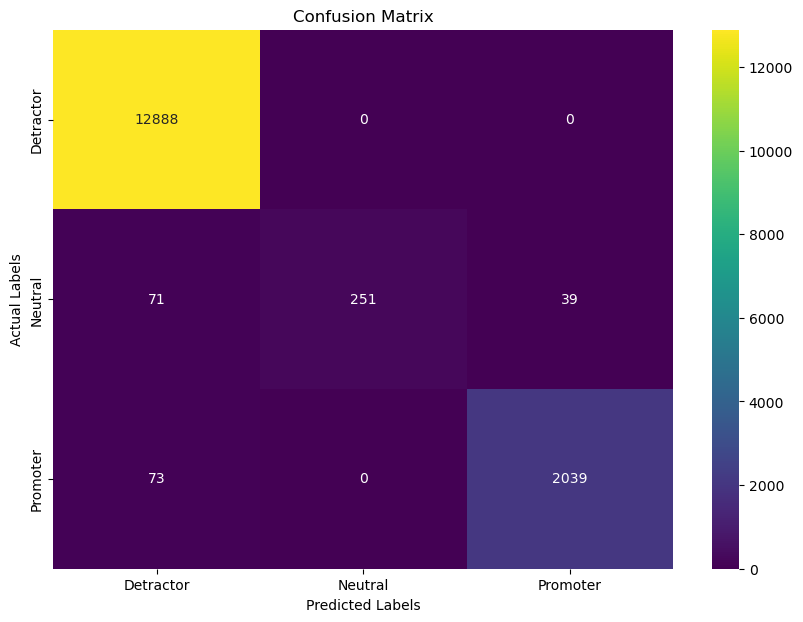

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # For a nicer heatmap visualization

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))  # Adjust the size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", xticklabels=unique_classes, yticklabels=unique_classes)
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

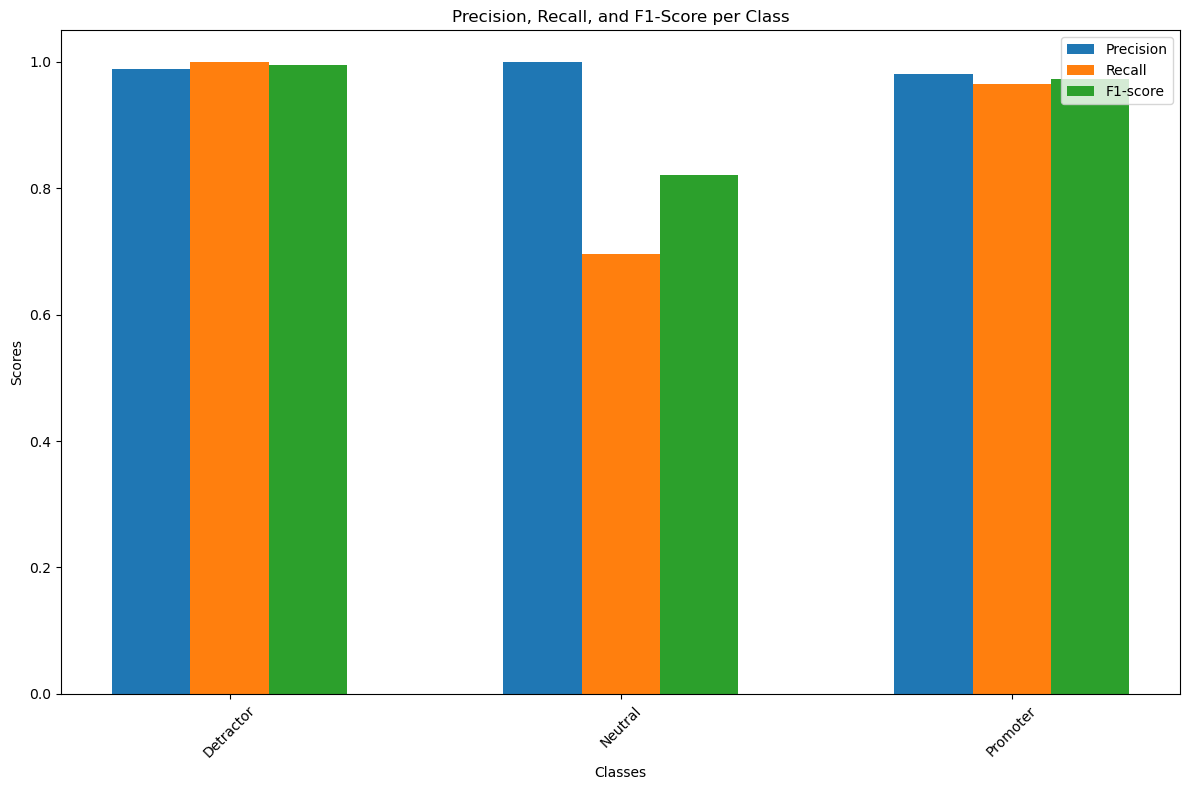

In [62]:
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
index = np.arange(len(unique_classes))
bar_width = 0.2

p_bar = ax.bar(index, precision, bar_width, label='Precision')
r_bar = ax.bar(index + bar_width, recall, bar_width, label='Recall')
f1_bar = ax.bar(index + 2 * bar_width, f1, bar_width, label='F1-score')

ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score per Class')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(unique_classes, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

In [73]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Set the default renderer to 'iframe' for Jupyter Notebooks or 'notebook' if using JupyterLab
pio.renderers.default = 'iframe'  # or 'notebook' for JupyterLab

# Initialize the plotly figure with a title and a single subplot for the ROC curves
fig = make_subplots(rows=1, cols=1, subplot_titles=['Multiclass ROC Curve'])

# Define a list of colors for the ROC curves
color_palette = [
    '#1f77b4',  # Muted blue
    '#ff7f0e',  # Safety orange
    '#2ca02c',  # Cooked asparagus green
    '#d62728',  # Brick red
    '#9467bd',  # Muted purple
    '#8c564b',  # Chestnut brown
    '#e377c2',  # Raspberry yogurt pink
    '#7f7f7f',  # Middle gray
    '#bcbd22',  # Curry yellow-green
    '#17becf'   # Blue-teal
]

for i, color in enumerate(color_palette[:len(unique_classes)]):
    fig.add_trace(go.Scatter(x=fpr[i], y=tpr[i], mode='lines',
                             name=f'Class {unique_classes[i]} (AUC = {roc_auc[i]:.2f})',
                             line=dict(color=color, width=2)))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Chance',
                         line=dict(color='gray', width=1.5, dash='dot')))

fig.update_layout(
    title='Multiclass ROC Curve',
    title_x=0.5,
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    legend_title='Class AUC',
    legend=dict(y=0.5, traceorder='reversed', font_size=12),
    margin=dict(l=40, r=40, t=85, b=40),
    paper_bgcolor='white',
    plot_bgcolor='white',
    font=dict(size=12, color='black')
)

fig.update_xaxes(range=[0, 1], showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(range=[0, 1.05], showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

In [65]:
from sklearn.metrics import cohen_kappa_score

kappa = cohen_kappa_score(y_test, y_pred)
print(f"Cohen's Kappa: {kappa}")

Cohen's Kappa: 0.9557484052073215


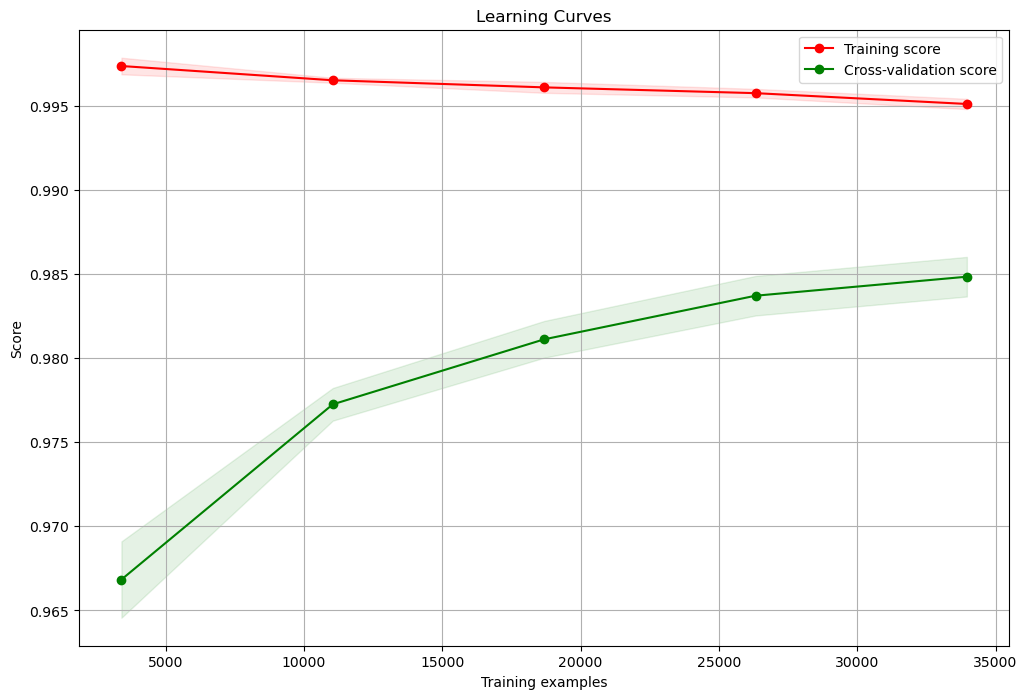

In [66]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train_delta_tfidf, y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)

# Calculate mean and std
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(12, 8))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curves")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [67]:
misclassified_idxs = np.where(y_test != y_pred)[0]
for idx in misclassified_idxs[:10]:
    print(f"Text: {X_test.iloc[idx]}")
    print(f"True class: {y_test.iloc[idx]}, Predicted class: {y_pred[idx]}\n")

Text: must admit feel many even get subsequently serve many route anyone know pissy even nice something unfair receiving hamper departed occasion elderly require however either every smile laugh query seem adopt embrace purple focus efficiency hold shockingly around glasgow quarter capacity yet another full exeter fairly display quote would revision price trend
True class: Neutral, Predicted class: Promoter

Text: tie much way
True class: Neutral, Predicted class: Detractor

Text: kiwi tongue stick cheeky playful blowing raspberry first zaltsburg transavia continue take clothing also laptop enough take firsable sense always laptop take also keep airaport ever
True class: Neutral, Predicted class: Detractor

Text: compassion ping every move eta realistically would go ahead continue string everyone lga compassion mention u would nothing could would would
True class: Promoter, Predicted class: Detractor

Text: horrific pegasus beyond refuse laughing face would find incompetence part go or